In [30]:
%matplotlib inline
from pylab import *
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import seaborn as sns


Uniqueregion et uniquecannom permettent de conserver les noms associés au variables catégoriques

In [62]:
file_path = "C:/Users/user/Downloads/"

data = pd.read_csv(file_path + "02-resultats-par-region.csv")
unique_cand_nom = data['cand_nom'].unique()
unique_region = data['reg_name'].unique()

columns_to_drop = ['url', 'reg_code', 'reg_code_3', 'num_tour', 'cand_num_panneau','cand_prenom', 'cand_civil']

data = data.drop(columns_to_drop, axis=1)

In [63]:
data

,reg_name,inscrits_nb,abstention_nb,abstention_pourc,votants_nb,blancs_nb,blancs_pourc_inscrits,blancs_pourc_votants,nuls_nb,nuls_pourc_inscrits,nuls_pourc_votants,exprimes_nb,exprimes_pourc_inscrits,exprimes_pourc_votants,cand_nom,cand_nb_voix,cand_rapport_exprim,cand_rapport_inscrits
0,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,ARTHAUD,1084,0.80,0.34
1,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,ROUSSEL,668,0.49,0.21
2,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,MACRON,18137,13.43,5.74
3,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,LASSALLE,1033,0.76,0.33
4,Guadeloupe,316023,174592,55.25,141431,2719,0.86,1.92,3627,1.15,2.56,135085,42.75,95.51,LE PEN,24204,17.92,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,HIDALGO,1589,1.07,0.65
212,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,JADOT,4801,3.25,1.98
213,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,PÉCRESSE,9363,6.33,3.85
214,Corse,243039,90636,37.29,152403,2521,1.04,1.65,1946,0.80,1.28,147936,60.87,97.07,POUTOU,1374,0.93,0.57


C:\Users\user\AppData\Local\Temp\ipykernel_5828\2148764376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


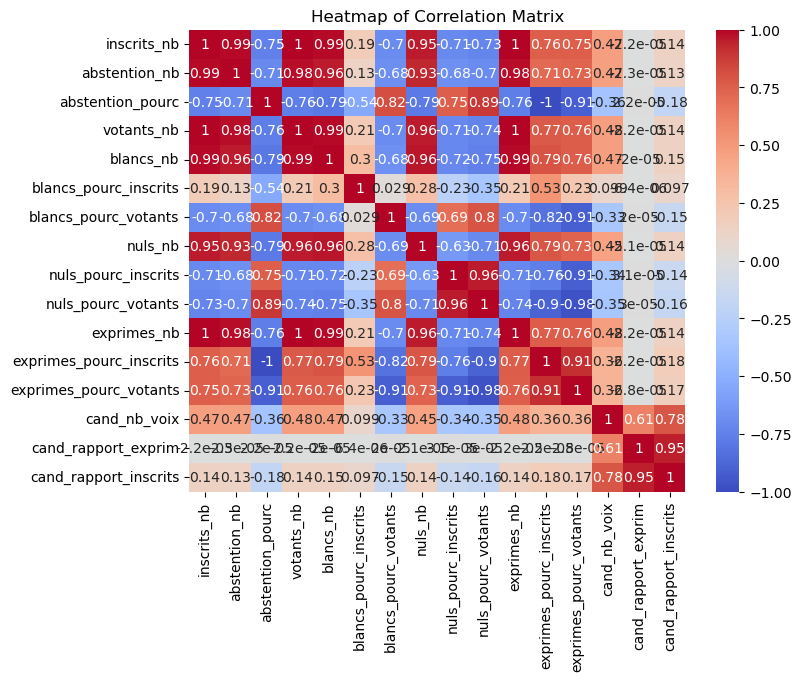

In [64]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

On supprime les colonnes avec beaucoup de corréaltions entre elles (>0.8)

In [65]:
np.fill_diagonal(corr_matrix.values, 0)

high_correlations = []
for column in corr_matrix.columns:
    for index, row_value in corr_matrix.loc[corr_matrix[column] > 0.8, column].iteritems():
        high_correlations.append((column, index, row_value))
    for index, row_value in corr_matrix.loc[corr_matrix[column] < -0.8, column].iteritems():
        high_correlations.append((column, index, row_value))

for pair in high_correlations:
    print(f"{pair[0]} et {pair[1]}: {pair[2]:.2f}")

inscrits_nb et abstention_nb: 0.99
inscrits_nb et votants_nb: 1.00
inscrits_nb et blancs_nb: 0.99
inscrits_nb et nuls_nb: 0.95
inscrits_nb et exprimes_nb: 1.00
abstention_nb et inscrits_nb: 0.99
abstention_nb et votants_nb: 0.98
abstention_nb et blancs_nb: 0.96
abstention_nb et nuls_nb: 0.93
abstention_nb et exprimes_nb: 0.98
abstention_pourc et blancs_pourc_votants: 0.82
abstention_pourc et nuls_pourc_votants: 0.89
abstention_pourc et exprimes_pourc_inscrits: -1.00
abstention_pourc et exprimes_pourc_votants: -0.91
votants_nb et inscrits_nb: 1.00
votants_nb et abstention_nb: 0.98
votants_nb et blancs_nb: 0.99
votants_nb et nuls_nb: 0.96
votants_nb et exprimes_nb: 1.00
blancs_nb et inscrits_nb: 0.99
blancs_nb et abstention_nb: 0.96
blancs_nb et votants_nb: 0.99
blancs_nb et nuls_nb: 0.96
blancs_nb et exprimes_nb: 0.99
blancs_pourc_votants et abstention_pourc: 0.82
blancs_pourc_votants et exprimes_pourc_inscrits: -0.82
blancs_pourc_votants et exprimes_pourc_votants: -0.91
nuls_nb et insc

C:\Users\user\AppData\Local\Temp\ipykernel_5828\1448318637.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row_value in corr_matrix.loc[corr_matrix[column] > 0.8, column].iteritems():
C:\Users\user\AppData\Local\Temp\ipykernel_5828\1448318637.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for index, row_value in corr_matrix.loc[corr_matrix[column] < -0.8, column].iteritems():


On supprime
'inscrits_nb','abstention_nb','votants_nb','nuls_pourc_inscrits','blancs_nb','nuls_nb','exprimes_nb', 'cand_nb_voix','exprimes_pourc_votants', 'cand_rapport_inscrits'

On ne supprime pas toutes les corrélations car il faut garder du contexte

In [66]:
features_to_remove = ['inscrits_nb','abstention_nb','votants_nb','nuls_pourc_inscrits','blancs_nb','nuls_nb','exprimes_nb', 'cand_nb_voix','exprimes_pourc_votants', 'cand_rapport_inscrits']
data = data.drop(columns=features_to_remove)
data

,reg_name,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_inscrits,cand_nom,cand_rapport_exprim
0,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ARTHAUD,0.80
1,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ROUSSEL,0.49
2,Guadeloupe,55.25,0.86,1.92,2.56,42.75,MACRON,13.43
3,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LASSALLE,0.76
4,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LE PEN,17.92
...,...,...,...,...,...,...,...,...
211,Corse,37.29,1.04,1.65,1.28,60.87,HIDALGO,1.07
212,Corse,37.29,1.04,1.65,1.28,60.87,JADOT,3.25
213,Corse,37.29,1.04,1.65,1.28,60.87,PÉCRESSE,6.33
214,Corse,37.29,1.04,1.65,1.28,60.87,POUTOU,0.93


C:\Users\user\AppData\Local\Temp\ipykernel_5828\2148764376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


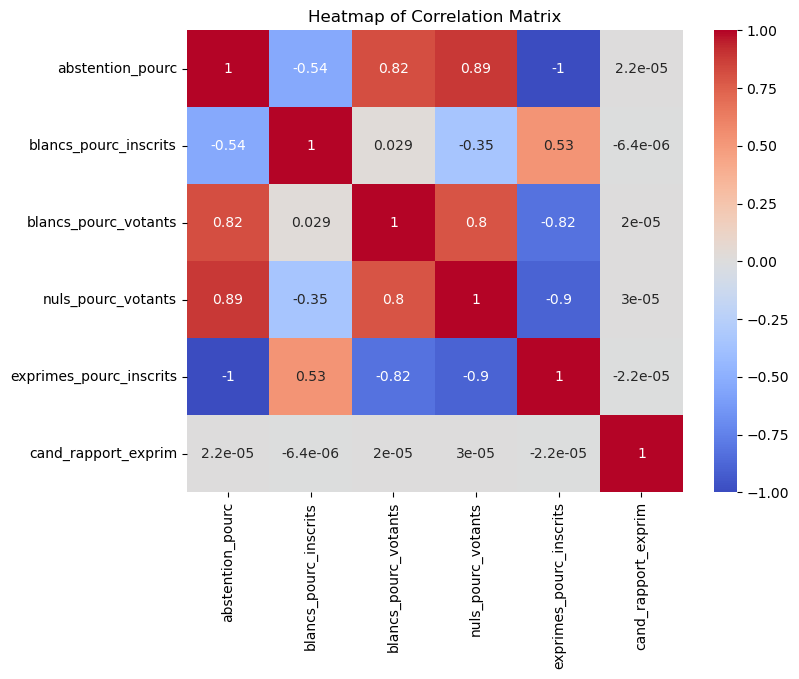

In [67]:
corr_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Matrix')
plt.show()

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

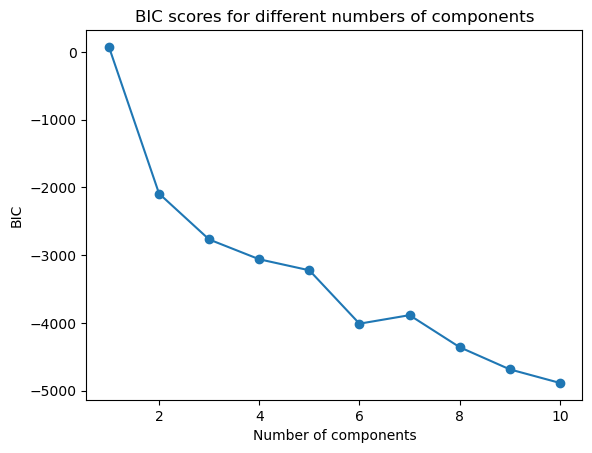

     reg_name  abstention_pourc  blancs_pourc_inscrits  blancs_pourc_votants  \
0  Guadeloupe             55.25                   0.86                  1.92   
1  Guadeloupe             55.25                   0.86                  1.92   
2  Guadeloupe             55.25                   0.86                  1.92   
3  Guadeloupe             55.25                   0.86                  1.92   
4  Guadeloupe             55.25                   0.86                  1.92   

   nuls_pourc_votants  exprimes_pourc_inscrits  cand_nom  cand_rapport_exprim  \
0                2.56                    42.75   ARTHAUD                 0.80   
1                2.56                    42.75   ROUSSEL                 0.49   
2                2.56                    42.75    MACRON                13.43   
3                2.56                    42.75  LASSALLE                 0.76   
4                2.56                    42.75    LE PEN                17.92   

   cluster  
0        5  
1     

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

selected_columns = ['abstention_pourc', 'blancs_pourc_inscrits', 'blancs_pourc_votants','nuls_pourc_votants', 'exprimes_pourc_inscrits', 'cand_rapport_exprim']

data_gmm = data[selected_columns]

scaler = StandardScaler()
data_gmm_scaled = scaler.fit_transform(data_gmm)

n_components = range(1, 11)  
bic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(data_gmm_scaled)
    bic_scores.append(gmm.bic(data_gmm_scaled))

plt.plot(n_components, bic_scores, marker='o')
plt.xlabel('Number of components')
plt.ylabel('BIC')
plt.title('BIC scores for different numbers of components')
plt.show()

optimal_n = n_components[np.argmin(bic_scores)]
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
gmm.fit(data_gmm_scaled)

data['cluster'] = gmm.predict(data_gmm_scaled)

data

In [69]:
data

,reg_name,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_inscrits,cand_nom,cand_rapport_exprim,cluster
0,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ARTHAUD,0.80,5
1,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ROUSSEL,0.49,5
2,Guadeloupe,55.25,0.86,1.92,2.56,42.75,MACRON,13.43,5
3,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LASSALLE,0.76,5
4,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LE PEN,17.92,5
...,...,...,...,...,...,...,...,...,...
211,Corse,37.29,1.04,1.65,1.28,60.87,HIDALGO,1.07,8
212,Corse,37.29,1.04,1.65,1.28,60.87,JADOT,3.25,8
213,Corse,37.29,1.04,1.65,1.28,60.87,PÉCRESSE,6.33,8
214,Corse,37.29,1.04,1.65,1.28,60.87,POUTOU,0.93,8


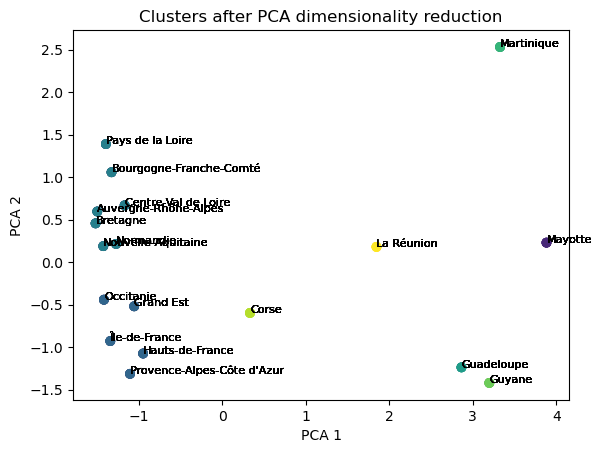

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
data_gmm_pca = pca.fit_transform(data_gmm_scaled)

pca_df = pd.DataFrame(data=data_gmm_pca, columns=['PCA 1', 'PCA 2'])
pca_df['region'] = data['reg_name']
pca_df['cluster'] = data['cluster']

fig, ax = plt.subplots()
scatter = ax.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df['region']):
    ax.annotate(txt, (pca_df['PCA 1'][i], pca_df['PCA 2'][i]), fontsize=8)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Clusters after PCA dimensionality reduction')

plt.show()

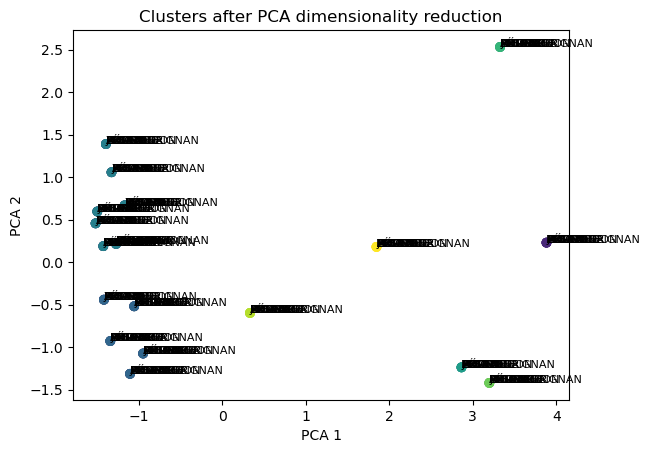

In [74]:
pca = PCA(n_components=2, random_state=42)
data_gmm_pca = pca.fit_transform(data_gmm_scaled)

pca_df = pd.DataFrame(data=data_gmm_pca, columns=['PCA 1', 'PCA 2'])
pca_df['candidat'] = data['cand_nom']
pca_df['cluster'] = data['cluster']

fig, ax = plt.subplots()
scatter = ax.scatter(pca_df['PCA 1'], pca_df['PCA 2'], c=pca_df['cluster'], cmap='viridis', alpha=0.5)

for i, txt in enumerate(pca_df['candidat']):
    ax.annotate(txt, (pca_df['PCA 1'][i], pca_df['PCA 2'][i]), fontsize=8)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('Clusters after PCA dimensionality reduction')

plt.show()

In [77]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

data['cand_region'] = data['cand_nom'].astype(str) + '_' + data['reg_name'].astype(str)

encoder = OneHotEncoder(sparse=False)
cand_region_encoded = encoder.fit_transform(data[['cand_region']])


combined_data = np.concatenate([data_gmm_scaled, cand_region_encoded], axis=1)

gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(combined_data)
data['cluster'] = gmm.predict(combined_data)

data

C:\Users\user\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,reg_name,abstention_pourc,blancs_pourc_inscrits,blancs_pourc_votants,nuls_pourc_votants,exprimes_pourc_inscrits,cand_nom,cand_rapport_exprim,cluster,cand_region
0,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ARTHAUD,0.80,2,ARTHAUD_Guadeloupe
1,Guadeloupe,55.25,0.86,1.92,2.56,42.75,ROUSSEL,0.49,2,ROUSSEL_Guadeloupe
2,Guadeloupe,55.25,0.86,1.92,2.56,42.75,MACRON,13.43,2,MACRON_Guadeloupe
3,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LASSALLE,0.76,2,LASSALLE_Guadeloupe
4,Guadeloupe,55.25,0.86,1.92,2.56,42.75,LE PEN,17.92,2,LE PEN_Guadeloupe
...,...,...,...,...,...,...,...,...,...,...
211,Corse,37.29,1.04,1.65,1.28,60.87,HIDALGO,1.07,3,HIDALGO_Corse
212,Corse,37.29,1.04,1.65,1.28,60.87,JADOT,3.25,3,JADOT_Corse
213,Corse,37.29,1.04,1.65,1.28,60.87,PÉCRESSE,6.33,3,PÉCRESSE_Corse
214,Corse,37.29,1.04,1.65,1.28,60.87,POUTOU,0.93,3,POUTOU_Corse


In [79]:
data.iloc[:,8].unique()

array([2, 1, 3, 0], dtype=int64)